In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
X = np.load('x_digits.npy')
Y = np.load('y_digits.npy')

In [3]:
X[0].shape, Y.shape

((129, 71), (35631,))

There are 35 thousand 'pictures' (observations) representing numbers from 0 to 9. Each number has 129 rows with 71 columns. (maybe, maybe not, check again)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.reshape([-1, 129, 71, 1])
X_test = X_test.reshape([-1, 129, 71, 1])


We split the data in train and test sets as we will use the built-in split from tensorflow when training the neural network.

In [5]:
X_train[1].shape

(129, 71, 1)

### Take 1:
We start of with a small neural network, keeping the size of the feature maps relavtively small. As advised we use the ReLu activation function. The size of the feature map is 3 x 3. We also use EarlyStopping callback and Learning Rate callback.

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(X_train[0].shape))
model.add(tf.keras.layers.Conv2D(8, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = "True")
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 2)

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay = 0.002)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 30, validation_split=0.2, callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.1400 - loss: 3.1947 - val_accuracy: 0.2510 - val_loss: 1.9091 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3351 - loss: 1.7517 - val_accuracy: 0.6904 - val_loss: 0.9012 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7465 - loss: 0.7481 - val_accuracy: 0.8223 - val_loss: 0.5392 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8577 - loss: 0.4218 - val_accuracy: 0.8720 - val_loss: 0.3843 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9089 - loss: 0.2721 - val_accuracy: 0.8995 - val_loss: 0.3058 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9381 - loss: 0.1886 - val_accuracy: 0.9035 - val_loss: 0.2971 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9531 - l

In [32]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, Y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9903 - loss: 0.0368
Loss + accuracy on train data: [0.08210557699203491, 0.9790204763412476]
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9179 - loss: 0.3361
Loss + accuracy on test data: [0.31636345386505127, 0.9218465089797974]


In [10]:
single_example = X_test[0]  # Example, take the first sample from the test set
single_example = single_example.reshape(129, 71, 1)  # Reshape to (129, 71, 1)

# Expand dimensions to make it a batch of size 1 (shape becomes (1, 129, 71, 1))
single_example = np.expand_dims(single_example, axis=0)

# Make a prediction
prediction = model.predict(single_example)

# Print the prediction (depending on your output layer, this could be probabilities or class labels)
prediction, Y_test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


(array([[3.4356715e-17, 1.2530337e-07, 2.4519258e-12, 1.8482159e-10,
         3.2657042e-07, 9.9960572e-01, 5.1621953e-07, 3.9195173e-04,
         1.2881912e-06, 7.9463618e-08]], dtype=float32),
 5.0)

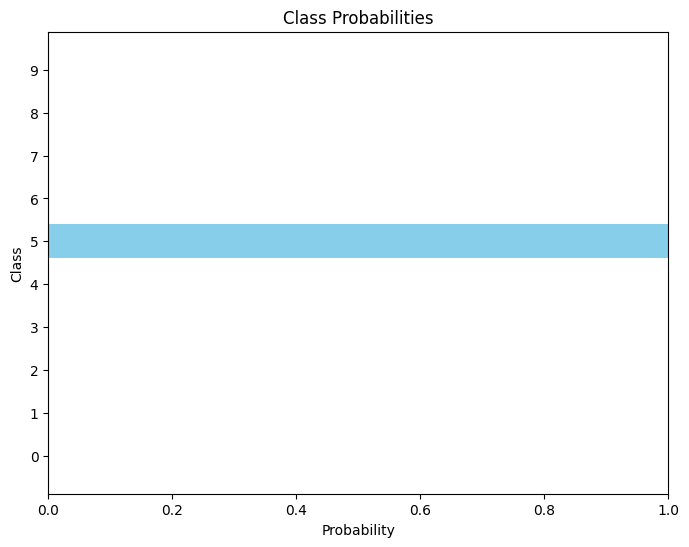

In [15]:
classes = np.arange(10)

probabilities = prediction.flatten()
# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(classes, probabilities, color='skyblue')
plt.yticks(classes)
plt.xlabel('Probability')
plt.ylabel('Class')
plt.title('Class Probabilities')
plt.xlim(0, 1)  # Since it's a probability, we limit the x-axis to [0, 1]

# Show the plot
plt.show()

In [18]:
from collections import Counter

threshold = 0.5

# Dictionary to count how often each digit is predicted with low confidence
struggling_digits = Counter()

struggling_pairs = Counter()

# Iterate through predictions and corresponding true labels
for probs, true_label in zip(model.predict(X_train), Y_train):
    predicted_label = np.argmax(probs)  # Get the predicted class (class with highest probability)
    max_prob = np.max(probs)  # Get the highest probability

    # If the model is uncertain or if the prediction is incorrect
    if max_prob < threshold or predicted_label != true_label:
        struggling_pairs[(true_label, predicted_label)] += 1  # Count the true-predicted pair

# Output the struggling digit pairs (true label, predicted label)
print("Struggling digit pairs (True Label, Predicted Label):", struggling_pairs)

891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Struggling digit pairs (True Label, Predicted Label): Counter({(9.0, 1): 36, (5.0, 9): 34, (9.0, 5): 22, (5.0, 1): 21, (4.0, 1): 20, (0.0, 2): 19, (3.0, 8): 19, (6.0, 8): 17, (8.0, 6): 17, (2.0, 7): 15, (2.0, 0): 15, (1.0, 9): 14, (8.0, 3): 14, (1.0, 4): 14, (2.0, 8): 14, (5.0, 4): 13, (7.0, 2): 12, (8.0, 2): 12, (2.0, 3): 12, (0.0, 7): 11, (2.0, 4): 11, (9.0, 9): 11, (5.0, 5): 11, (2.0, 2): 11, (3.0, 2): 10, (3.0, 3): 10, (4.0, 2): 9, (4.0, 4): 9, (1.0, 5): 9, (7.0, 7): 9, (7.0, 5): 9, (6.0, 6): 8, (6.0, 7): 8, (0.0, 4): 8, (0.0, 0): 8, (6.0, 3): 7, (3.0, 6): 7, (8.0, 1): 7, (9.0, 3): 7, (7.0, 8): 7, (3.0, 9): 6, (9.0, 2): 6, (0.0, 6): 6, (1.0, 1): 6, (4.0, 5): 6, (8.0, 4): 5, (8.0, 5): 5, (0.0, 3): 5, (3.0, 5): 5, (6.0, 0): 5, (6.0, 5): 5, (8.0, 8): 4, (3.0, 7): 4, (9.0, 0): 4, (4.0, 0): 4, (6.0, 1): 4, (7.0, 6): 4, (0.0, 9): 4, (1.0, 2): 4, (6.0, 4): 3, (1.0, 8): 3, (7.0, 9): 3, (7.0, 4): 3, (7.0, 1): 3, (3.0, 0): 3, (8.0, 9): 3, (4.0, 7): 3,

In [22]:
predictions = model.predict(X_train)

891/891 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


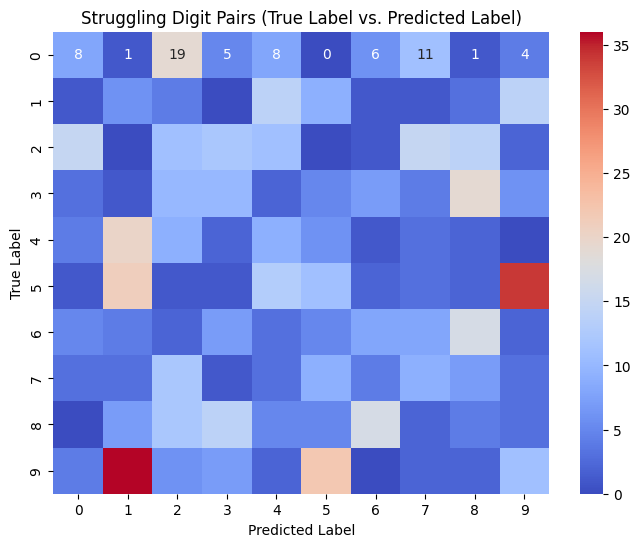

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

threshold = 0.5

# Dictionary to count the struggling pairs (true_label, predicted_label)
struggling_pairs = Counter()

# Iterate through predictions and corresponding true labels
for probs, true_label in zip(predictions, Y_train):
    predicted_label = np.argmax(probs)  # Get the predicted class (class with highest probability)
    max_prob = np.max(probs)  # Get the highest probability
    # If the model is uncertain or if the prediction is incorrect
    if max_prob < threshold or predicted_label != true_label:
        struggling_pairs[(int(true_label), int(predicted_label))] += 1  # Count the true-predicted pair

# Initialize a confusion matrix (10x10 since we have digits 0-9)
confusion_matrix = np.zeros((10, 10))

# Populate the confusion matrix with the struggling pairs
for (true_label, predicted_label), count in struggling_pairs.items():
    confusion_matrix[true_label, predicted_label] = count

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Struggling Digit Pairs (True Label vs. Predicted Label)')
plt.show()

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(X_train[0].shape))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same"))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same"))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same"))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 3, restore_best_weights = "True")
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 1)

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay = 0.005)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 30, validation_split=0.2, callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 148s 202ms/step - accuracy: 0.4459 - loss: 3.3447 - val_accuracy: 0.9026 - val_loss: 0.3032 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.9179 - loss: 0.2596 - val_accuracy: 0.9176 - val_loss: 0.2454 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 145s 203ms/step - accuracy: 0.9513 - loss: 0.1504 - val_accuracy: 0.9354 - val_loss: 0.1935 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 150s 211ms/step - accuracy: 0.9630 - loss: 0.1121 - val_accuracy: 0.9279 - val_loss: 0.2077 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 144s 202ms/step - accuracy: 0.9828 - loss: 0.0533 - val_accuracy: 0.9472 - val_loss: 0.1909 - learning_rate: 5.0000e-04
Epoch 6/30
185/713 ━━━━━━━━━━━━━━━━━━━━ 1:40 190ms/step - accuracy: 0.9898 - loss: 0.0329

KeyboardInterrupt: 

In [33]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)
history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks= [early_stopping_cb, lr_scheduler])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2751 - loss: 6.7857 - val_accuracy: 0.3643 - val_loss: 2.3307 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4323 - loss: 2.0958 - val_accuracy: 0.5243 - val_loss: 1.6699 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5302 - loss: 1.6069 - val_accuracy: 0.5185 - val_loss: 1.6058 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5681 - loss: 1.4307 - val_accuracy: 0.6060 - val_loss: 1.3237 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6070 - loss: 1.2590 - val_accuracy: 0.5980 - val_loss: 1.2620 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6384 - loss: 1.1299 - val_accuracy: 0.6201 - val_loss: 1.2541 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6465 - loss: 1.1671 - 

Well this works okay, the validation accuracy is not perfect, but it's satisfying. Let's try with swish activation function.

In [34]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation = "swish", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "swish", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "swish", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)
history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks= [early_stopping_cb, lr_scheduler])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2560 - loss: 5.7668 - val_accuracy: 0.4313 - val_loss: 2.0350 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4197 - loss: 2.0398 - val_accuracy: 0.4654 - val_loss: 1.7794 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5057 - loss: 1.6367 - val_accuracy: 0.5590 - val_loss: 1.4783 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5581 - loss: 1.3812 - val_accuracy: 0.5424 - val_loss: 1.4503 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5839 - loss: 1.2322 - val_accuracy: 0.6027 - val_loss: 1.1591 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6182 - loss: 1.1189 - val_accuracy: 0.6308 - val_loss: 1.0953 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6409 - loss: 1.0729 - 

Okay so changing to swish activation function doesn't change anything. Let's move back to the ReLu and increase the number of neurons.

In [35]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(400, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(300, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)
history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks= [early_stopping_cb, lr_scheduler])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.3111 - loss: 10.0604 - val_accuracy: 0.5034 - val_loss: 1.7093 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5414 - loss: 1.7691 - val_accuracy: 0.6476 - val_loss: 1.2296 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6448 - loss: 1.2819 - val_accuracy: 0.6769 - val_loss: 1.2401 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6993 - loss: 1.0510 - val_accuracy: 0.7043 - val_loss: 1.0639 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7346 - loss: 0.8924 - val_accuracy: 0.7179 - val_loss: 0.9688 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7602 - loss: 0.8421 - val_accuracy: 0.7485 - val_loss: 0.8364 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7875 - 

Nice! The train accuracy reached a whopping 97%, unfortunately, the validation accuracy is 10 percent points less, which is an unacceptable proof of overfitting. Therefore, we will try to change the optimizer to AdamW to introduce weight_decay and regularization. Let's start with weight decay = 0.0075

In [36]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(400, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(300, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.0075)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)
history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks= [early_stopping_cb, lr_scheduler])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.2981 - loss: 10.5311 - val_accuracy: 0.5232 - val_loss: 1.6547 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.5555 - loss: 1.6789 - val_accuracy: 0.6078 - val_loss: 1.2272 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6543 - loss: 1.1291 - val_accuracy: 0.6881 - val_loss: 0.9643 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7051 - loss: 0.9096 - val_accuracy: 0.7465 - val_loss: 0.7937 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7320 - loss: 0.8024 - val_accuracy: 0.7374 - val_loss: 0.8175 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7706 - loss: 0.6918 - val_accuracy: 0.7362 - val_loss: 0.8411 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.8288 - 

Hmm that doesn't seem like a lot of help, let's try reducing the number of neurons and add more layers... but that will come in the next episode!

Below is CNN that has the best accuracy of 90 percent


In [ ]:
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train, Y_train, test_size=0.2)
 
model = tf.keras.Sequential()
 
model.add(tf.keras.layers.Input(X_train[0].shape))
 
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
 
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
 
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
 
model.add(tf.keras.layers.GlobalAveragePooling2D())
 
model.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.BatchNormalization())
 
model.add(tf.keras.layers.Dense(10, activation="softmax"))
 
EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=1)
 
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0005, weight_decay=0.005)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
 
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True
)
 
datagen_val = tf.keras.preprocessing.image.ImageDataGenerator()
 
history = model.fit(
    datagen_train.flow(X_train_split, Y_train_split, batch_size=32),
    epochs=30,
    validation_data=datagen_val.flow(X_val_split, Y_val_split),
    callbacks=[EarlyStoppingCB, LearningRateCB]
)

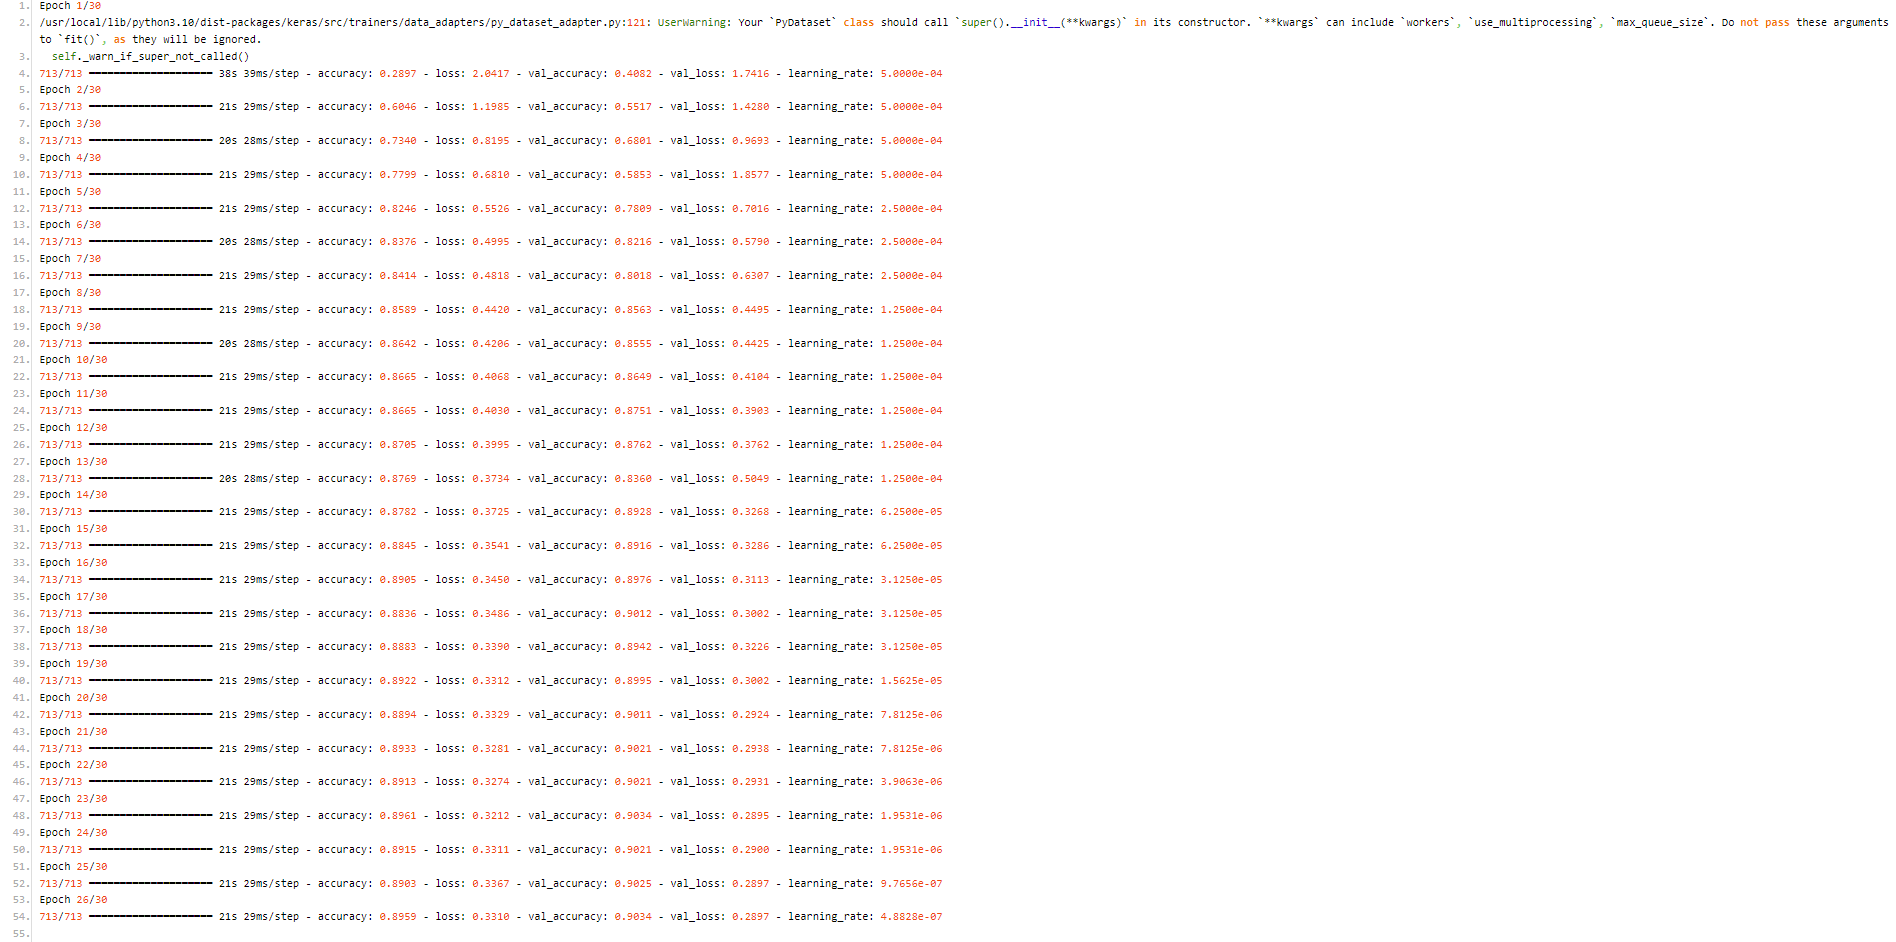

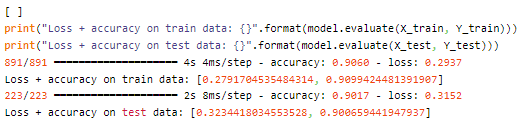